In [1]:
import awkward as ak
import hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np

In [2]:
filename = "/home/prayag/Coffea/data/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root"
events = NanoEventsFactory.from_root(
    filename,
    schemaclass=NanoAODSchema.v7
).events()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f00090bec20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

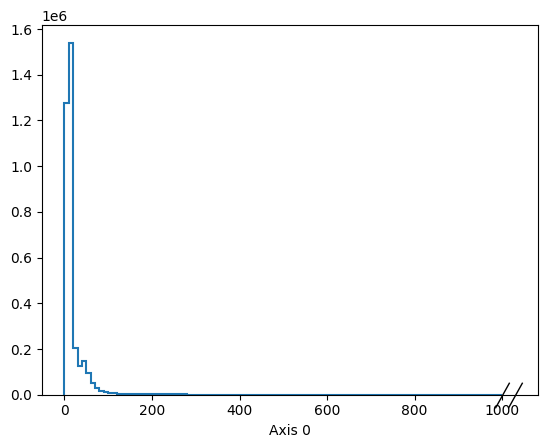

In [3]:
h = hist.Hist.new.Reg(100,0,1000).Double().fill(ak.flatten(events.Jet.pt))
h.plot()

In [4]:
integral = h.sum()
bin_values = h.values()
nbins = len(bin_values)
normed_values = np.array([])
for value in bin_values :
    normed_values = np.append(normed_values, value / integral)
np.sum(normed_values)

0.9999999999999999

In [5]:
a, = h.axes
g = hist.Hist(a).fill(10*h.density())
g

Hist(Regular(100, 0, 1000, label='Axis 0'), storage=Double()) # Sum: 100.0

In [6]:
def normalize(input_hist):
    output_hist_axis , = input_hist.axes
    output_hist = hist.Hist(output_hist_axis)
    integral = input_hist.sum()
    for bin_index in range(input_hist.size - 2) :
        output_hist[bin_index] = input_hist[bin_index] / integral
    return output_hist

In [7]:
import mplhep as hep
import matplotlib.pyplot as plt
hep.style.use(["CMS","fira","firamath"])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f00634a18a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

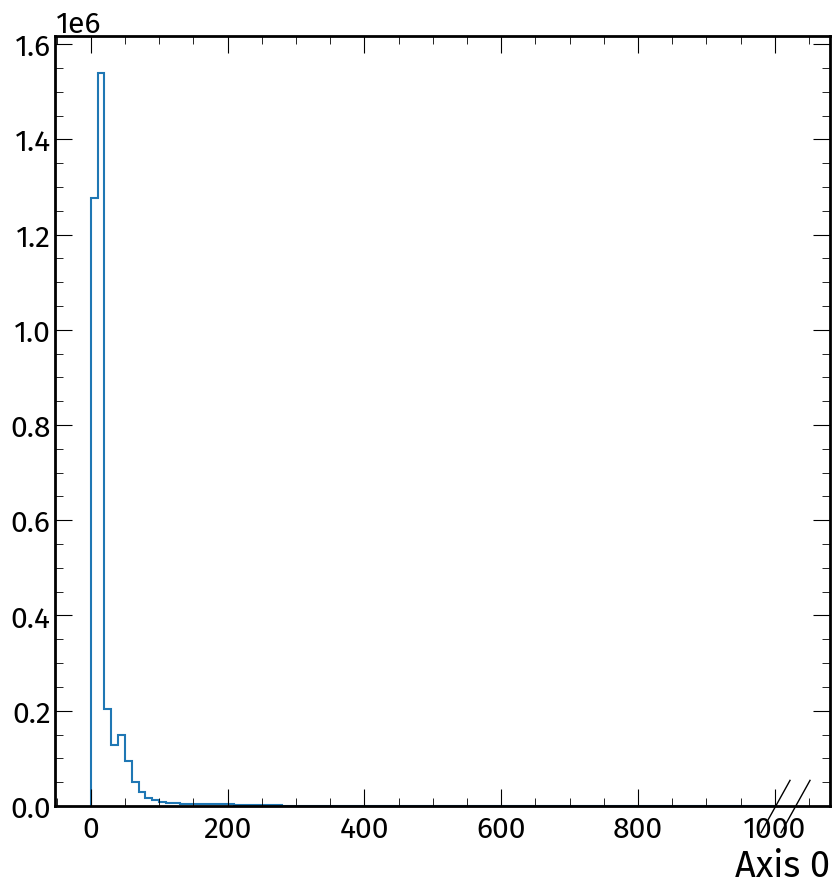

In [8]:
hep.histplot(
    h
)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0005043010>, errorbar=None, legend_artist=None)]

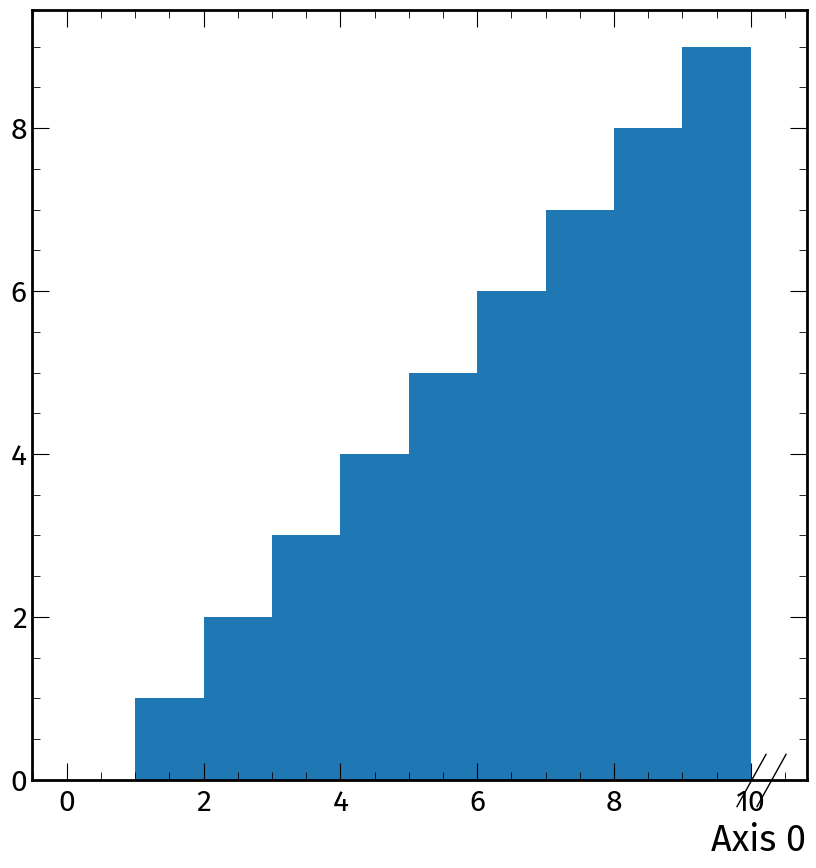

In [9]:
g = hist.Hist.new.Reg(10,0,10).Double()
for i in np.arange(1,11,1):
    for j in range(i):
        g.fill(i)
hep.histplot(
    g,
    histtype="fill"

)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0004f56260>, errorbar=None, legend_artist=None)]

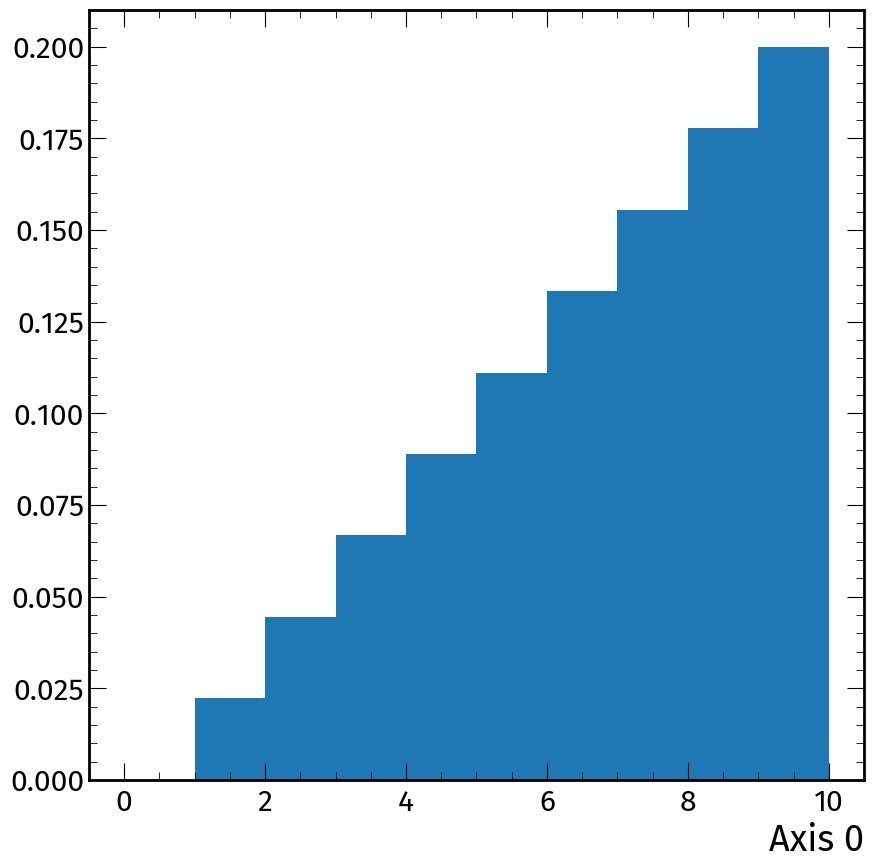

In [10]:
hep.histplot(
    normalize(g),
    histtype="fill"
)

In [11]:
g.sum()

45.0

In [18]:
for field in events.HLT.fields :
    if field.startswith("PFMET"):
        print(field)

PFMET110_PFMHT110_IDTight
PFMET120_PFMHT120_IDTight
PFMET130_PFMHT130_IDTight
PFMET140_PFMHT140_IDTight
PFMET100_PFMHT100_IDTight_CaloBTagCSV_3p1
PFMET110_PFMHT110_IDTight_CaloBTagCSV_3p1
PFMET120_PFMHT120_IDTight_CaloBTagCSV_3p1
PFMET130_PFMHT130_IDTight_CaloBTagCSV_3p1
PFMET140_PFMHT140_IDTight_CaloBTagCSV_3p1
PFMET120_PFMHT120_IDTight_PFHT60
PFMETNoMu120_PFMHTNoMu120_IDTight_PFHT60
PFMETTypeOne120_PFMHT120_IDTight_PFHT60
PFMETTypeOne110_PFMHT110_IDTight
PFMETTypeOne120_PFMHT120_IDTight
PFMETTypeOne130_PFMHT130_IDTight
PFMETTypeOne140_PFMHT140_IDTight
PFMETNoMu110_PFMHTNoMu110_IDTight
PFMETNoMu120_PFMHTNoMu120_IDTight
PFMETNoMu130_PFMHTNoMu130_IDTight
PFMETNoMu140_PFMHTNoMu140_IDTight
PFMET200_NotCleaned
PFMET200_HBHECleaned
PFMET250_HBHECleaned
PFMET300_HBHECleaned
PFMET200_HBHE_BeamHaloCleaned
PFMETTypeOne200_HBHE_BeamHaloCleaned


In [19]:
triggered = events[events.HLT.PFMETNoMu120_PFMHTNoMu120_IDTight_PFHT60 | events.HLT.PFMETNoMu120_PFMHTNoMu120_IDTight | events.HLT.PFMETNoMu140_PFMHTNoMu140_IDTight]
print(len(events), len(triggered))

297347 597
